<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/KNN_US_House_of_Representatives_Congressmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
column_names= ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']
congress = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',names=column_names)
congress.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   republican  434 non-null    object
 1   n           434 non-null    object
 2   y           434 non-null    object
 3   n.1         434 non-null    object
 4   y.1         434 non-null    object
 5   y.2         434 non-null    object
 6   y.3         434 non-null    object
 7   n.2         434 non-null    object
 8   n.3         434 non-null    object
 9   n.4         434 non-null    object
 10  y.4         434 non-null    object
 11  ?           434 non-null    object
 12  y.5         434 non-null    object
 13  y.6         434 non-null    object
 14  y.7         434 non-null    object
 15  n.5         434 non-null    object
 16  y.8         434 non-null    object
dtypes: object(17)
memory usage: 57.8+ KB


In [ ]:
congress.describe()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [ ]:
congress.replace('?',np.NaN,inplace = True)
congress.head

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [ ]:
# Can .map() only series. For now I do mapping like this:

congress[congress=='n'] = 0
congress[congress=='y'] = 1
congress.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


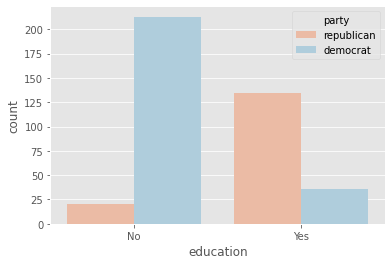

In [ ]:
sns.countplot(x='education', hue='party', data=congress, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

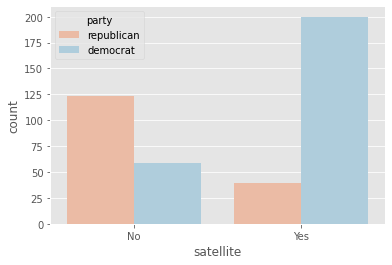

In [ ]:
sns.countplot(x='satellite', hue='party', data=congress, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

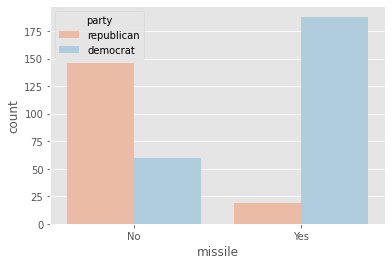

In [ ]:
sns.countplot(x='missile', hue='party', data=congress, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# KNN on datasets

## Because it contains NaN values it results into a ValueError

Remember, Sklearn API requires:


**1) Data in numpy array or pandas DataFrame**

**2) Features need to be continuous values**

**3) No missing values in the data**

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = congress['party'].values
X = congress.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


# Predict the labels for the training data X
y_pred = knn.predict(X)

In [ ]:
# Clean Nan Values

congress.replace(np.NaN,0,inplace = True)
congress.head

<bound method NDFrame.head of           party  infants  water  ...  crime  duty_free_exports  eaa_rsa
0    republican      0.0    1.0  ...    1.0                0.0      1.0
1    republican      0.0    1.0  ...    1.0                0.0      0.0
2      democrat      0.0    1.0  ...    1.0                0.0      0.0
3      democrat      0.0    1.0  ...    0.0                0.0      1.0
4      democrat      1.0    1.0  ...    1.0                1.0      1.0
..          ...      ...    ...  ...    ...                ...      ...
430  republican      0.0    0.0  ...    1.0                0.0      1.0
431    democrat      0.0    0.0  ...    0.0                0.0      1.0
432  republican      0.0    0.0  ...    1.0                0.0      1.0
433  republican      0.0    0.0  ...    1.0                0.0      1.0
434  republican      0.0    1.0  ...    1.0                0.0      0.0

[435 rows x 17 columns]>

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = congress['party'].values
X = congress.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


# Predict the labels for the training data X
y_pred = knn.predict(X)

In [ ]:
X_new_row = np.array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541]])
print(X_new_row.shape)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new_row)
print("Prediction: {}".format(new_prediction))

(1, 16)
Prediction: ['democrat']


## How to measure KNN performance?

### In classification, accuracy is a commonly used metric
Accuracy = Fraction of correct predictions
Of course need to compute accuracy on new data that the model hasn't seen before (test data). It's called unseen data.

### Train_test_split


# Building a pipeline

## Preprocess to NaN

In [ ]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))



## Imputation and Pipeline

Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM.

In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


## Impute, scale and (Classifier or Regressor)